<a href="https://colab.research.google.com/github/springboardmentor345a-create/Projects_2/blob/shanmuka--priya/LEAGUE_WINNER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import pandas as pd
# Corrected path to read the file directly from the Colab environment
path = "ScoreSight_ML_Season_LeagueWinner_Champion (1).csv"
league_winner = pd.read_csv(path)
league_winner.head()

,season,team,matches_played,wins,draws,losses,points_per_game,goals_scored,goals_conceded,goal_difference,target_total_points,target_league_position,target_champion,target_top_4,target_top_6,target_relegated
0,2015-16,Bournemouth,38,11,9,18,1.105263,45.0,67.0,-22.0,42,15,0,0,0,0
1,2015-16,Norwich,38,9,7,22,0.894737,39.0,67.0,-28.0,34,19,0,0,0,1
2,2015-16,Man United,38,19,9,10,1.736842,49.0,35.0,14.0,66,4,0,1,1,0
3,2015-16,Chelsea,38,12,14,12,1.315789,59.0,53.0,6.0,50,10,0,0,0,0
4,2015-16,Everton,38,11,14,13,1.236842,59.0,55.0,4.0,47,11,0,0,0,0


In [6]:
league_winner.isnull().sum()

,0
season,0
team,0
matches_played,0
wins,0
draws,0
losses,0
points_per_game,0
goals_scored,0
goals_conceded,0
goal_difference,0


In [7]:
league_winner.describe()

,matches_played,wins,draws,losses,points_per_game,goals_scored,goals_conceded,goal_difference,target_total_points,target_league_position,target_champion,target_top_4,target_top_6,target_relegated
count,180.0,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,38.0,14.544444,8.911111,14.544444,1.382749,53.833333,53.833333,0.000000,52.544444,10.372222,0.050000,0.205556,0.305556,0.150000
std,0.0,6.297399,2.874058,6.018892,0.478125,17.635509,13.931396,28.486006,18.168769,5.774177,0.218553,0.405234,0.461927,0.358067
min,38.0,2.000000,2.000000,1.000000,0.315789,20.000000,22.000000,-69.000000,12.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,38.0,10.000000,7.000000,10.750000,1.052632,40.000000,44.750000,-19.250000,40.000000,5.000000,0.000000,0.000000,0.000000,0.000000
50%,38.0,13.000000,9.000000,15.000000,1.315789,51.000000,54.000000,-2.500000,50.000000,10.000000,0.000000,0.000000,0.000000,0.000000
75%,38.0,19.000000,11.000000,18.000000,1.736842,65.250000,63.000000,15.250000,66.000000,15.000000,0.000000,0.000000,1.000000,0.000000
max,38.0,32.000000,15.000000,30.000000,2.631579,106.000000,104.000000,79.000000,100.000000,20.000000,1.000000,1.000000,1.000000,1.000000


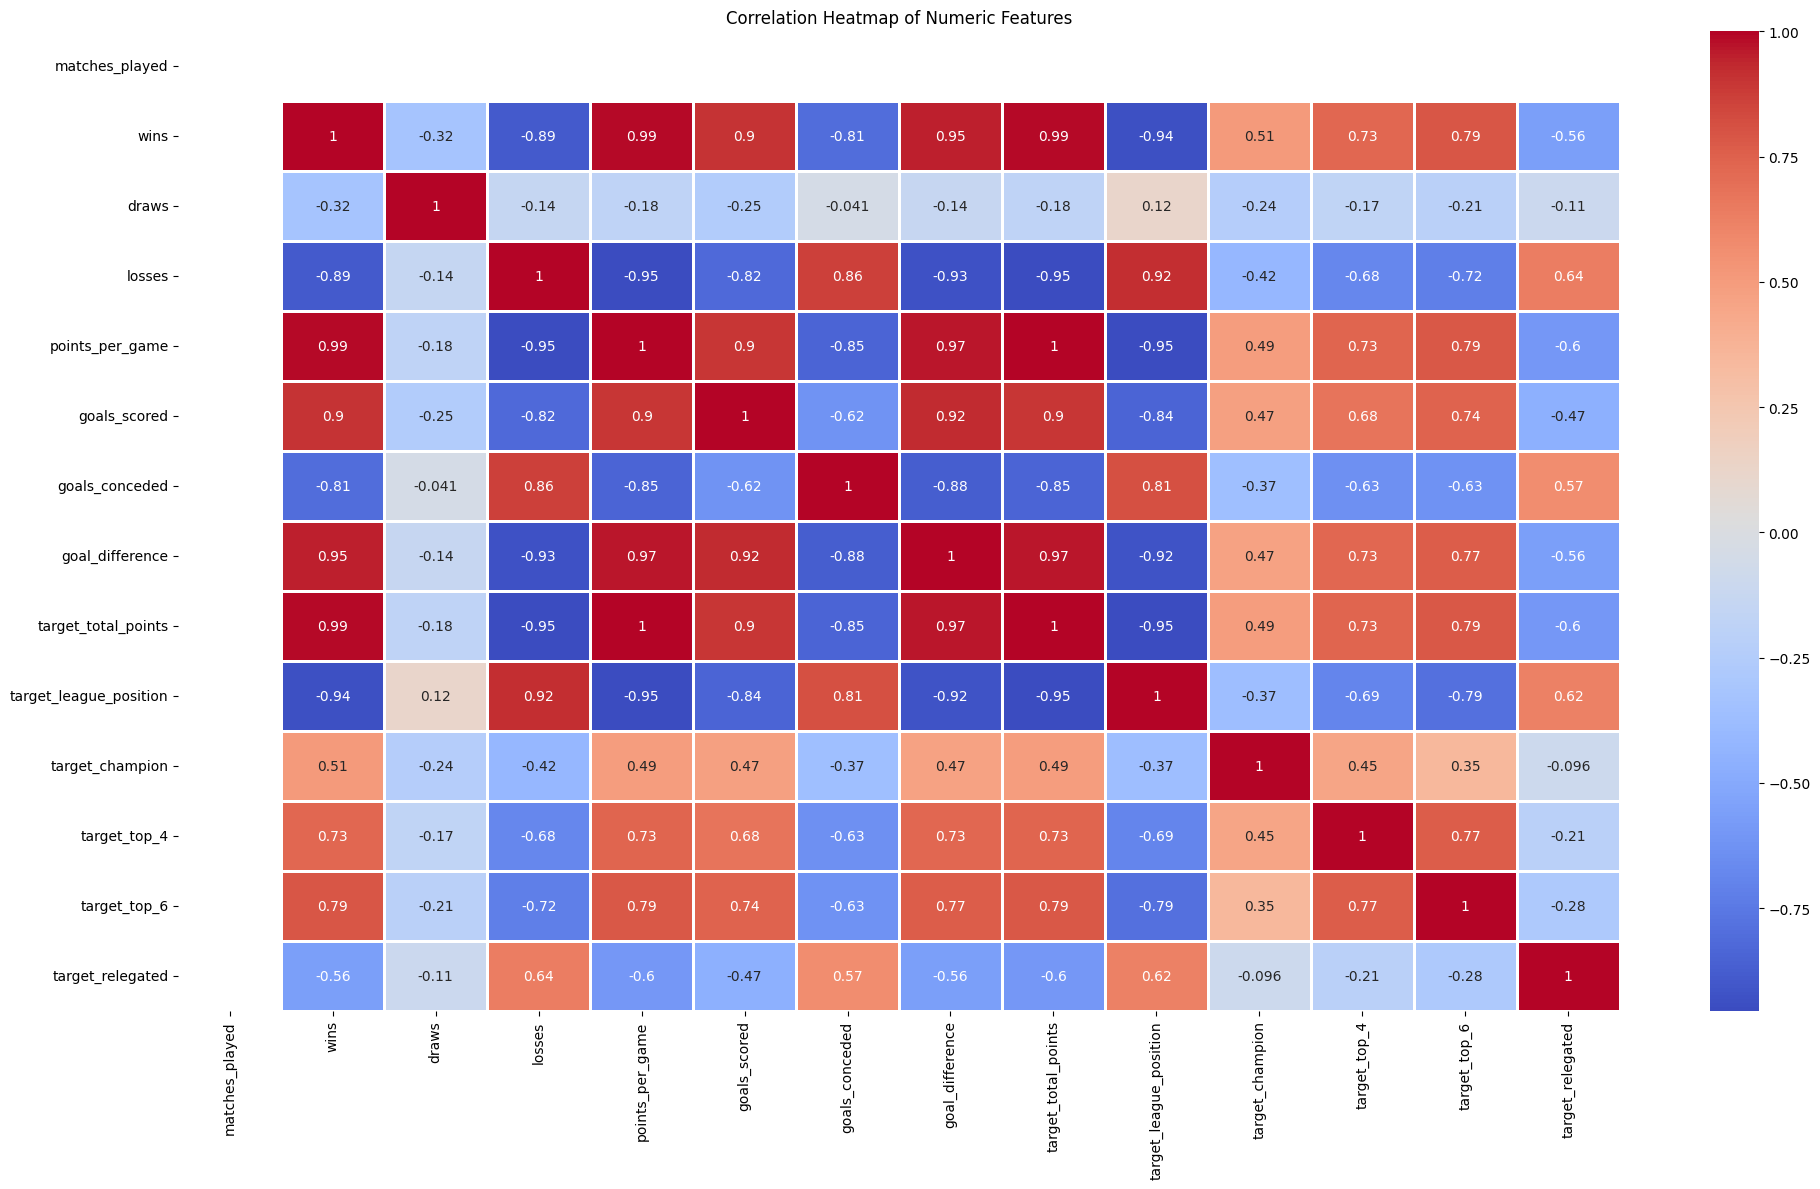

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
numeric_df_match_winner = league_winner.select_dtypes(include='number')
correlation_matrix = numeric_df_match_winner.corr()
plt.figure(figsize=(20, 12))
sns.heatmap(correlation_matrix, annot=True,cmap='coolwarm',linewidths=2)
plt.title('Correlation Heatmap of Numeric Features')
plt.tight_layout()
plt.show()

In [9]:
selected_columns = [
    'matches_played',
    'wins',
    'draws',
    'losses',
    'goals_scored',
    'goals_conceded',
    'target_total_points',
    'target_champion'
]

league_winner = league_winner[selected_columns]
league_winner.head()

,matches_played,wins,draws,losses,goals_scored,goals_conceded,target_total_points,target_champion
0,38,11,9,18,45.0,67.0,42,0
1,38,9,7,22,39.0,67.0,34,0
2,38,19,9,10,49.0,35.0,66,0
3,38,12,14,12,59.0,53.0,50,0
4,38,11,14,13,59.0,55.0,47,0


In [10]:
#Checking for null values
league_winner.isnull().sum()

,0
matches_played,0
wins,0
draws,0
losses,0
goals_scored,0
goals_conceded,0
target_total_points,0
target_champion,0


In [11]:
#Checking for duplicates
league_winner.duplicated().sum()

np.int64(0)

Generating box plots for columns: ['matches_played', 'wins', 'draws', 'losses', 'goals_scored', 'goals_conceded', 'target_total_points', 'target_champion']


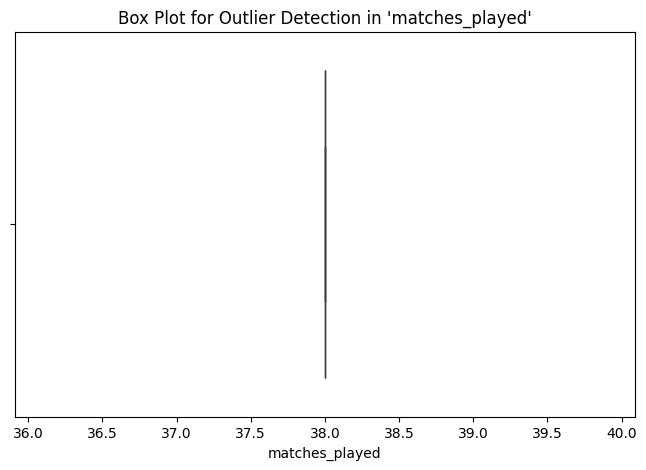

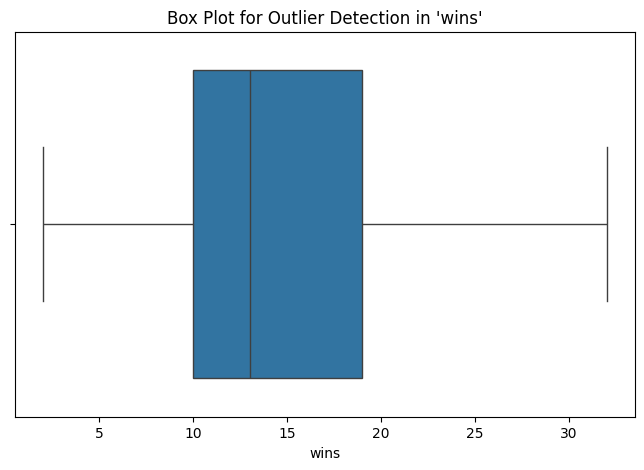

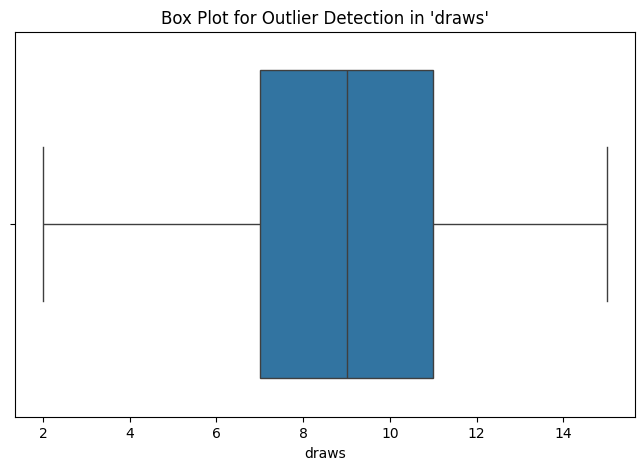

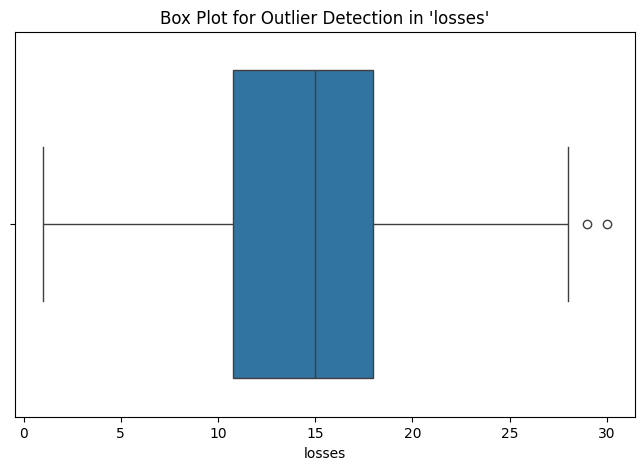

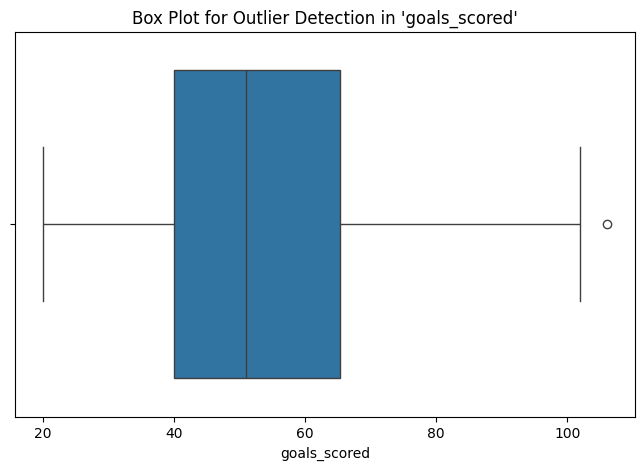

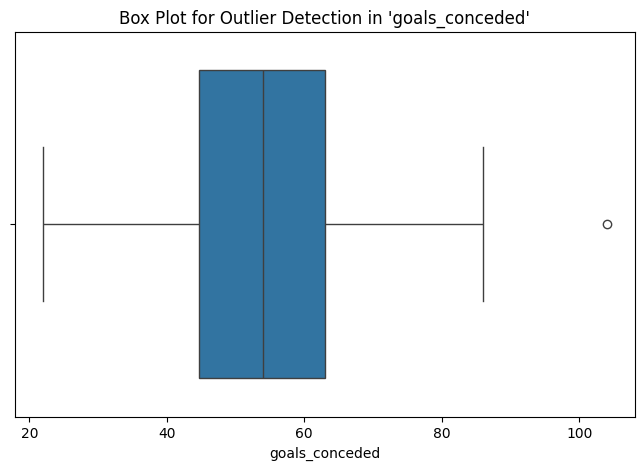

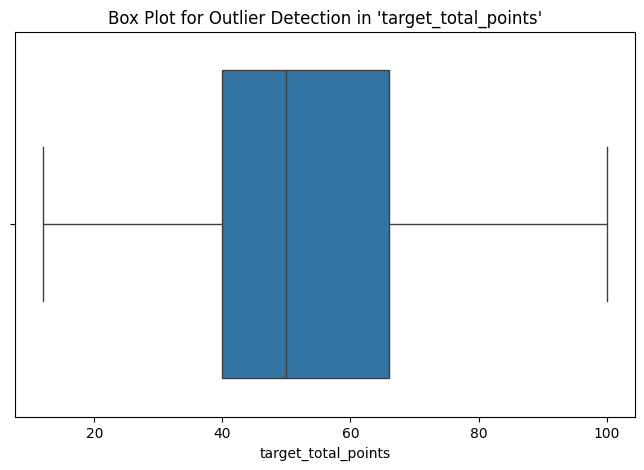

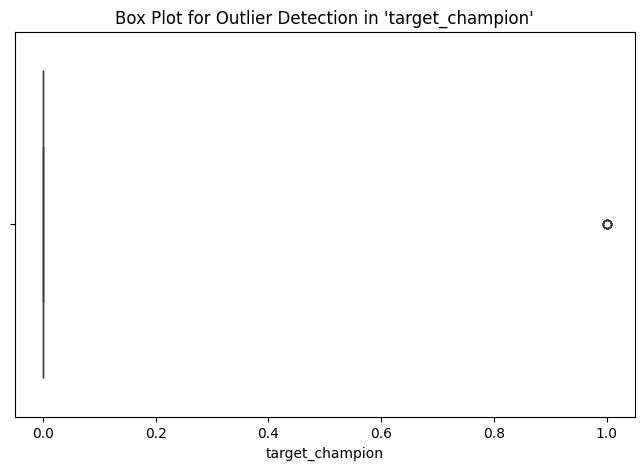

In [12]:
# Checking for outliers
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

numerical_cols = league_winner.select_dtypes(include=['number']).columns.tolist()

print(f"Generating box plots for columns: {numerical_cols}")

for column in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=league_winner[column])
    plt.title(f"Box Plot for Outlier Detection in '{column}'")
    plt.xlabel(column)
    plt.show()

In [13]:
# Removing outliers
import pandas as pd
import numpy as np

def remove_outliers_simple(df):

    numerical_cols = df.select_dtypes(include=['number']).columns.tolist()


    df_filtered = df.copy()

    for column in numerical_cols:
        Q1 = df_filtered[column].quantile(0.25)
        Q3 = df_filtered[column].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR


        df_filtered = df_filtered[(df_filtered[column] >= lower_bound) & (df_filtered[column] <= upper_bound)]

    rows_removed = len(df) - len(df_filtered)
    print(f"Original shape: {df.shape}")
    print(f"Cleaned shape: {df_filtered.shape}")
    print(f"Total rows removed as outliers across all numerical columns: {rows_removed}")

    return df_filtered

league_winner_cleaned = remove_outliers_simple(league_winner)

Original shape: (180, 8)
Cleaned shape: (168, 8)
Total rows removed as outliers across all numerical columns: 12


Generating NEW box plots for columns in cleaned data: ['matches_played', 'wins', 'draws', 'losses', 'goals_scored', 'goals_conceded', 'target_total_points', 'target_champion']


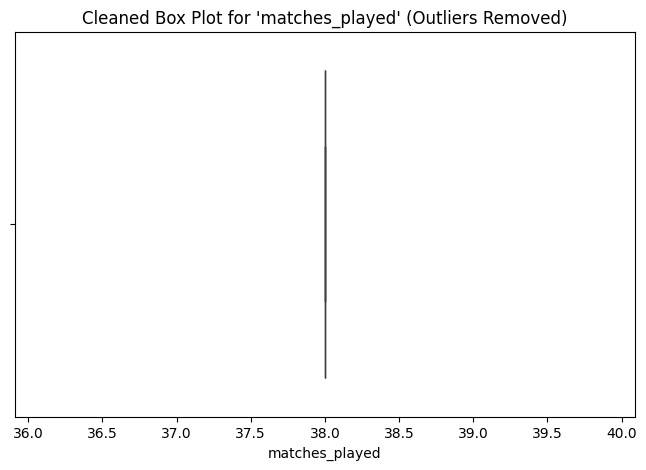

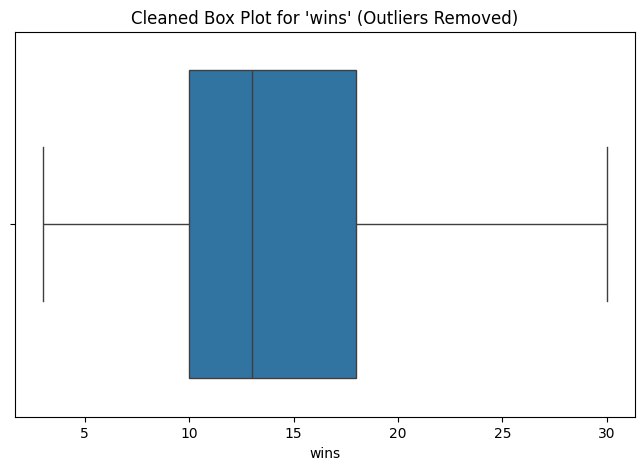

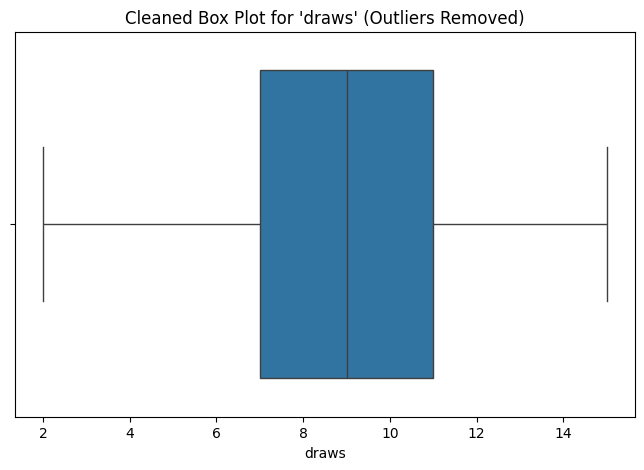

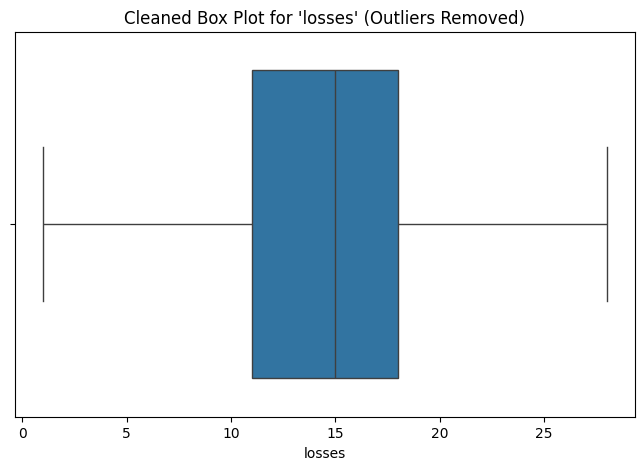

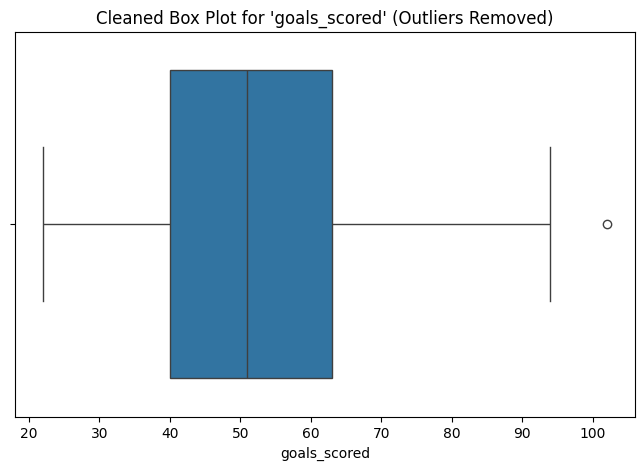

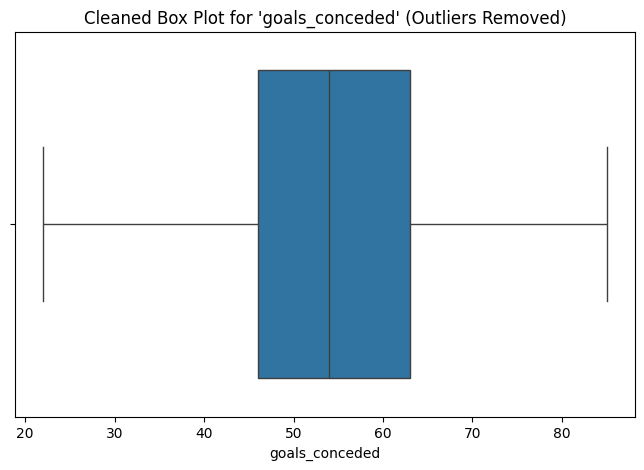

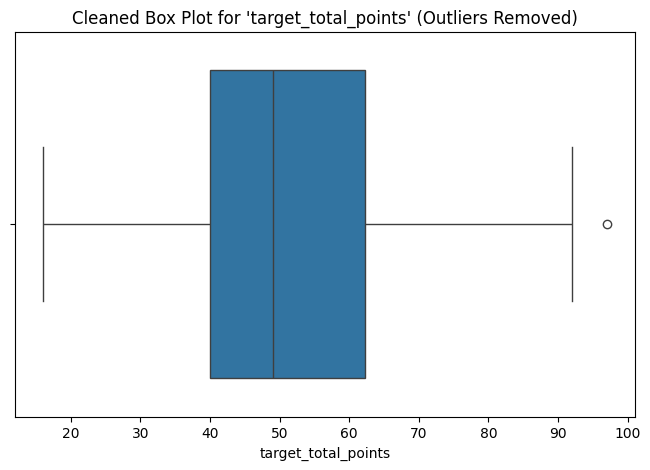

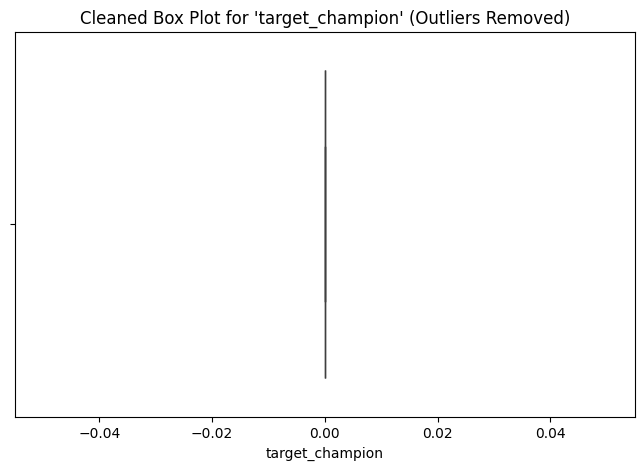

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

numerical_cols_cleaned = league_winner_cleaned.select_dtypes(include=['number']).columns.tolist()

print(f"Generating NEW box plots for columns in cleaned data: {numerical_cols_cleaned}")

for column in numerical_cols_cleaned:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=league_winner_cleaned[column])
    plt.title(f"Cleaned Box Plot for '{column}' (Outliers Removed)")
    plt.xlabel(column)
    plt.show()